# Part II - (Presentation Title)
## by (Olamidayo Mimiola)

## Investigation Overview


> I want to look at the features which can help predict the returns of the items. My focus is mainly on the Item Price and Store Size.


## Dataset Overview

> The dataset has 4990 entries which provides information regarding the returns and attributes of different stores types owned by an individual.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
store = pd.read_csv('excellent.csv')
store.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## DISTRIBUTION OF ITEM STORE RETURNS

> The item returns has a long tail with majority of the return price falling below 10,000 and few above 10,000. Using the log scale, a peak is seen at 8000
 

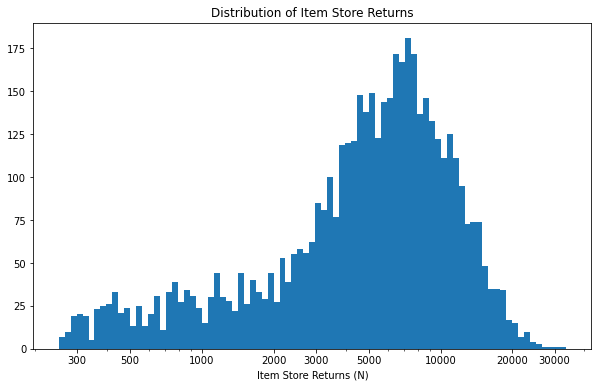

In [3]:
plt.figure(figsize=(10, 6))

log_binsize = 0.025
bins = 10**np.arange(2.4, np.log10(store['Item_Store_Returns'].max())+log_binsize, log_binsize)
ticks = [300, 500, 1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4]
labels = [f'{i:.0f}' for i in ticks]

plt.hist(x='Item_Store_Returns', data=store, bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Item Store Returns (N)')
plt.title('Distribution of Item Store Returns');

## DISTRIBUTION OF ITEM PRICE
> We see that most items are within the price range ~~N~~300 and ~~N~~500

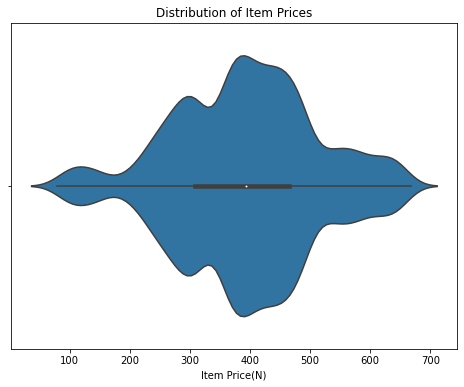

In [4]:
plt.figure(figsize=(8, 6))

sns.violinplot(x=store['Item_Price'])
plt.xlabel('Item Price(N)')
plt.title('Distribution of Item Prices');

## ITEM PRICE VS ITEM STORE RETURNS
> The higher the price of an item, the higher its return.

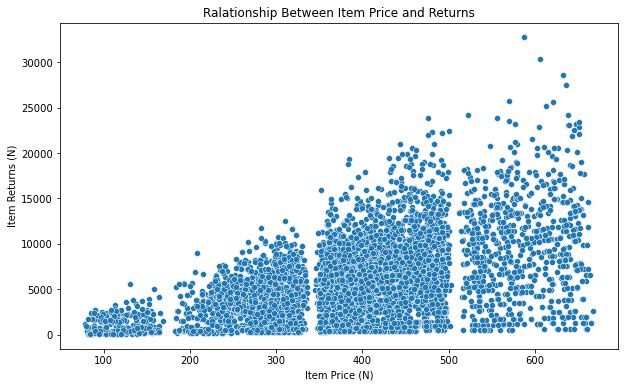

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Item_Store_Returns', x='Item_Price', data=store)
plt.xlabel('Item Price (N)')
plt.ylabel('Item Returns (N)')
plt.title('Ralationship Between Item Price and Returns');

## STORE SIZE ITEM PRICE VS ITEM RETURNS

> Small and Medium sized stores were not stocked with items with prices less than ~~N~~220. Most of the high priced items are in the small sized store. Studying the Medium sized store however, many items are within the price 250 and 500 and their returns are high compare to the other store sizes. Interestingly, The High store sizes were stocked with items with the least price. No wonder the returns were not very high there as seen in a previous visualization

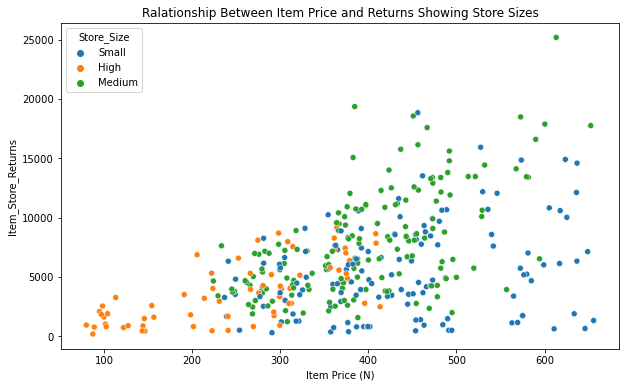

In [6]:
np.random.seed(1000)
sample = np.random.choice(store.shape[0], 500, replace=False)
store_sub = store.loc[sample]

plt.figure(figsize=(10, 6))
sns.scatterplot(y='Item_Store_Returns', x='Item_Price', data=store_sub, hue='Store_Size')
plt.title('Ralationship Between Item Price and Returns Showing Store Sizes')
plt.xlabel('Item Price (N)');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt